In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [45]:
data = pd.read_csv("uber-data.csv")
data.shape

(1028136, 4)

In [46]:
#data = data.sample(n=1000, random_state=5)data = data.sample(n=1000, random_state=5)
#sampled_indices = np.array(data.index)

In [47]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
data.head()

,Date/Time,Lat,Lon,Base
0,09-01-2014 00:01,40.22,-74.00,B02512
1,09-01-2014 00:01,40.75,-74.00,B02512
2,09-01-2014 00:03,40.76,-73.99,B02512
3,09-01-2014 00:06,40.74,-73.99,B02512
4,09-01-2014 00:11,40.81,-73.94,B02512


In [48]:
for column in data.columns:
    if data[column].dtype=='object':
        uniques = data[column].unique()
        print(f"Column {column} has {len(uniques)} number of unique values")
        print(uniques)
        print("\n")
    else:
        min_value = data[column].min()
        max_value = data[column].max()
        print(f"Column {column} has values in range {min_value} to {max_value}")
        print("\n")

Column Date/Time has 42907 number of unique values
['09-01-2014 00:01' '09-01-2014 00:03' '09-01-2014 00:06' ...
 '9/30/2014 3:01:00' '9/30/2014 3:07:00' '9/30/2014 3:26:00']


Column Lat has values in range 39.9897 to 41.3476


Column Lon has values in range -74.7736 to -72.7163


Column Base has 5 number of unique values
['B02512' 'B02598' 'B02617' 'B02682' 'B02764']




In [49]:
for column in data.columns:
    print(column, data[column].isnull().sum())

Date/Time 0
Lat 0
Lon 0
Base 0


In [50]:
data = pd.DataFrame(data)

data['Date/Time'] = pd.to_datetime(data['Date/Time'])

data['day_of_month'] = data['Date/Time'].dt.day
data['hour'] = data['Date/Time'].dt.hour

data.head()

,Date/Time,Lat,Lon,Base,day_of_month,hour
0,2014-09-01 00:01:00,40.22,-74.00,B02512,1,0
1,2014-09-01 00:01:00,40.75,-74.00,B02512,1,0
2,2014-09-01 00:03:00,40.76,-73.99,B02512,1,0
3,2014-09-01 00:06:00,40.74,-73.99,B02512,1,0
4,2014-09-01 00:11:00,40.81,-73.94,B02512,1,0


In [51]:
data=data.drop("Date/Time", axis=1)
data.head()

,Lat,Lon,Base,day_of_month,hour
0,40.22,-74.00,B02512,1,0
1,40.75,-74.00,B02512,1,0
2,40.76,-73.99,B02512,1,0
3,40.74,-73.99,B02512,1,0
4,40.81,-73.94,B02512,1,0


In [52]:
count_duplicates = data.duplicated().sum()
print(f"Number of duplicated rows: {count_duplicates}")

Number of duplicated rows: 31229


In [53]:
data = data.drop_duplicates()
data.shape

(996907, 5)

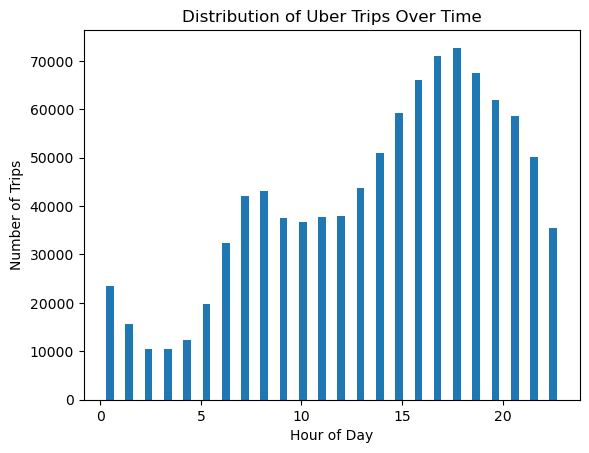

In [54]:
import matplotlib.pyplot as plt

plt.hist(data['hour'], bins=24, rwidth=0.4)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Distribution of Uber Trips Over Time')
plt.show()

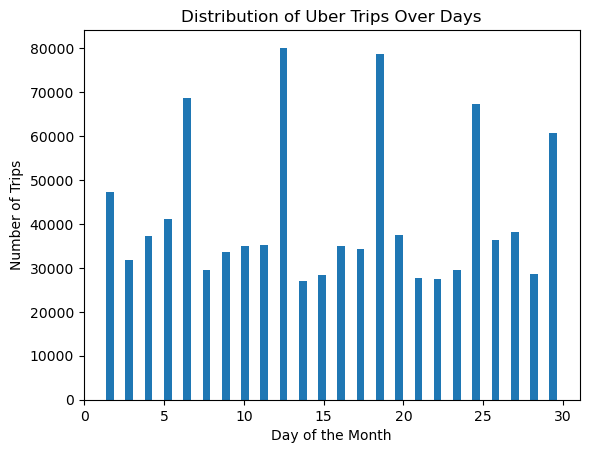

In [55]:
import matplotlib.pyplot as plt

plt.hist(data['day_of_month'], bins=24, rwidth=0.4)
plt.xlabel('Day of the Month')
plt.ylabel('Number of Trips')
plt.title('Distribution of Uber Trips Over Days')
plt.show()


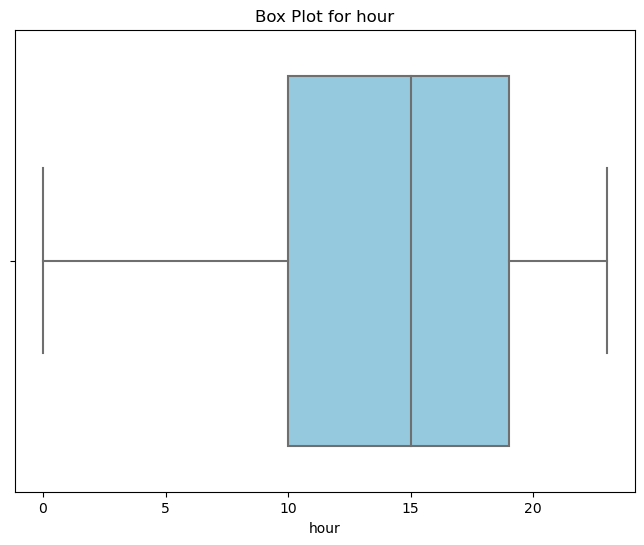

In [56]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['hour'], color='skyblue')
plt.title('Box Plot for hour')
plt.show()

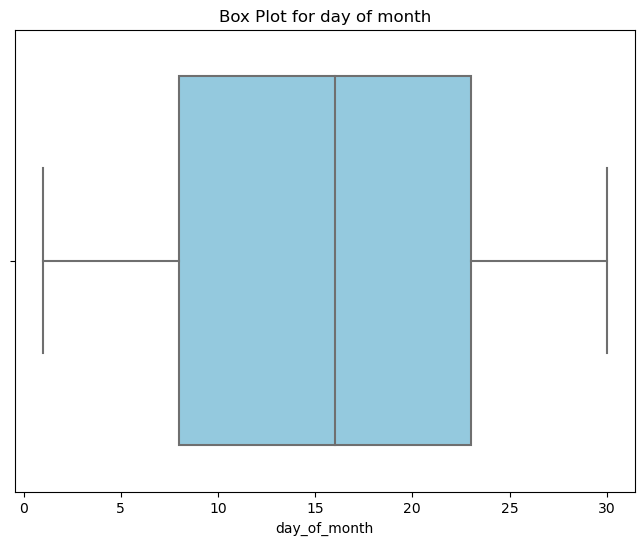

In [57]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['day_of_month'], color='skyblue')
plt.title('Box Plot for day of month')
plt.show()

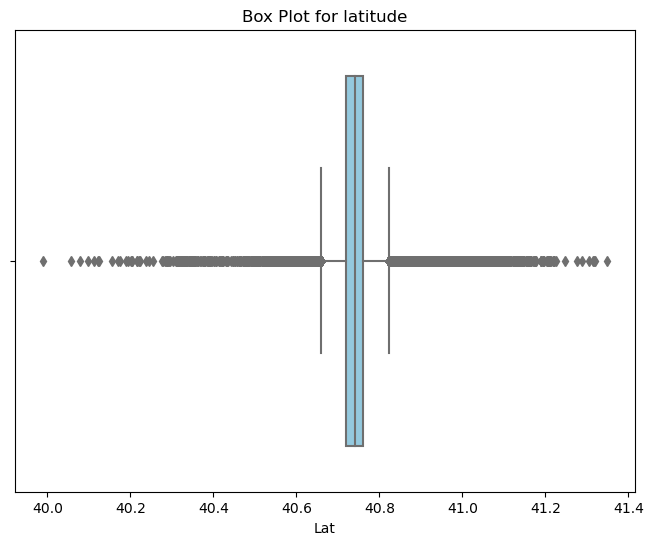

In [58]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Lat'], color='skyblue')
plt.title('Box Plot for latitude')
plt.show()

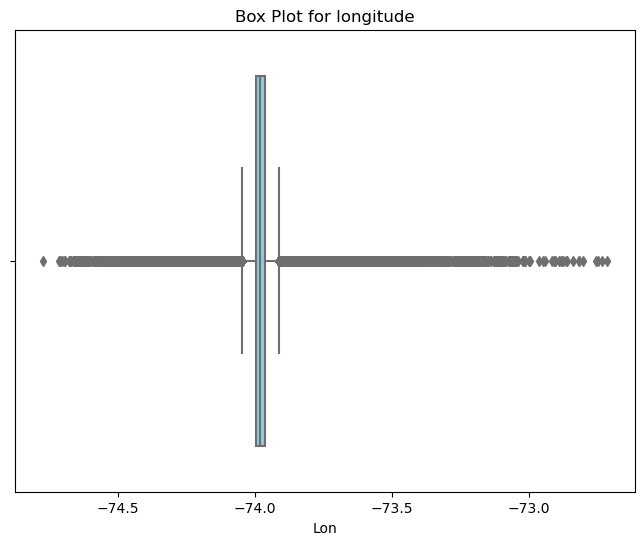

In [59]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Lon'], color='skyblue')
plt.title('Box Plot for longitude')
plt.show()

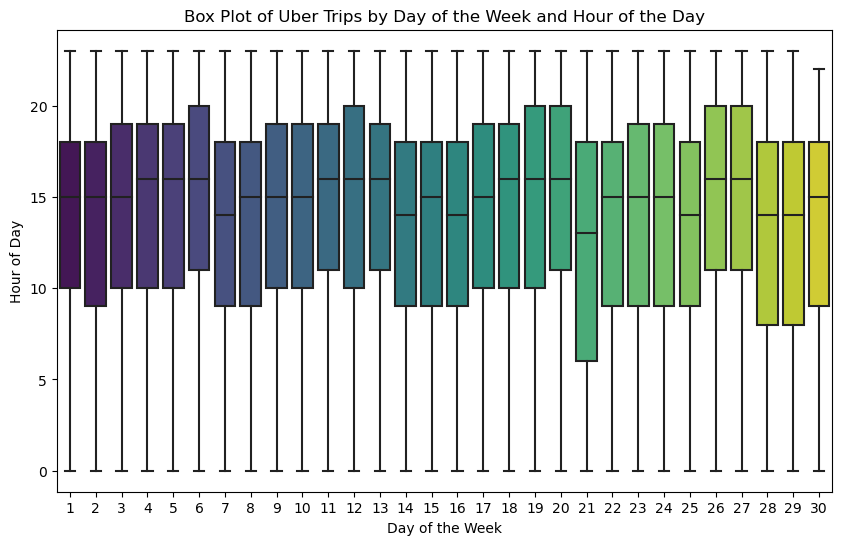

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_month', y='hour', data=data, palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of Day')
plt.title('Box Plot of Uber Trips by Day of the Week and Hour of the Day')
plt.show()

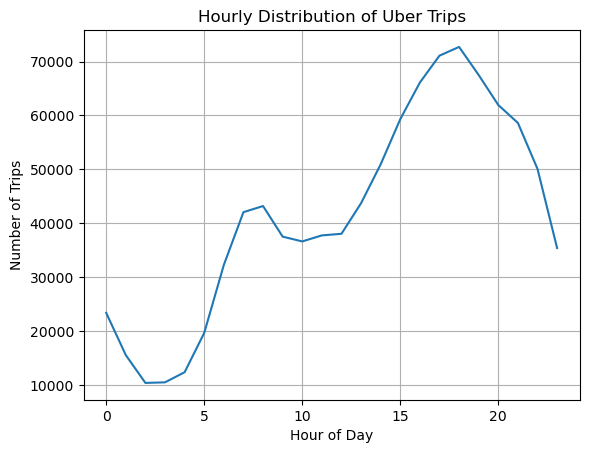

In [61]:
import matplotlib.pyplot as plt

hourly_counts = data['hour'].value_counts().sort_index()

plt.plot(hourly_counts.index, hourly_counts.values)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Hourly Distribution of Uber Trips')
plt.grid(True)
plt.show()

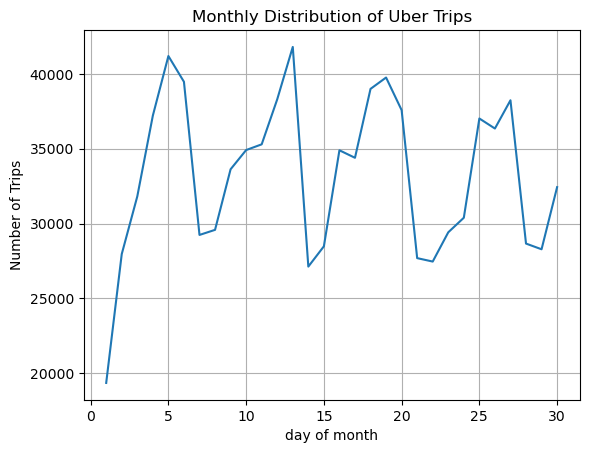

In [62]:
import matplotlib.pyplot as plt

hourly_counts = data['day_of_month'].value_counts().sort_index()

plt.plot(hourly_counts.index, hourly_counts.values)
plt.xlabel('day of month')
plt.ylabel('Number of Trips')
plt.title('Monthly Distribution of Uber Trips')
plt.grid(True)
plt.show()

In [63]:
for column in data.columns:
    if data[column].dtype=='object':
        uniques = data[column].unique()
        print(f"Column {column} has {len(uniques)} number of unique values")
        print(uniques)
        print("\n")
    else:
        min_value = data[column].min()
        max_value = data[column].max()
        print(f"Column {column} has values in range {min_value} to {max_value}")
        print("\n")

Column Lat has values in range 39.9897 to 41.3476


Column Lon has values in range -74.7736 to -72.7163


Column Base has 5 number of unique values
['B02512' 'B02598' 'B02617' 'B02682' 'B02764']


Column day_of_month has values in range 1 to 30


Column hour has values in range 0 to 23




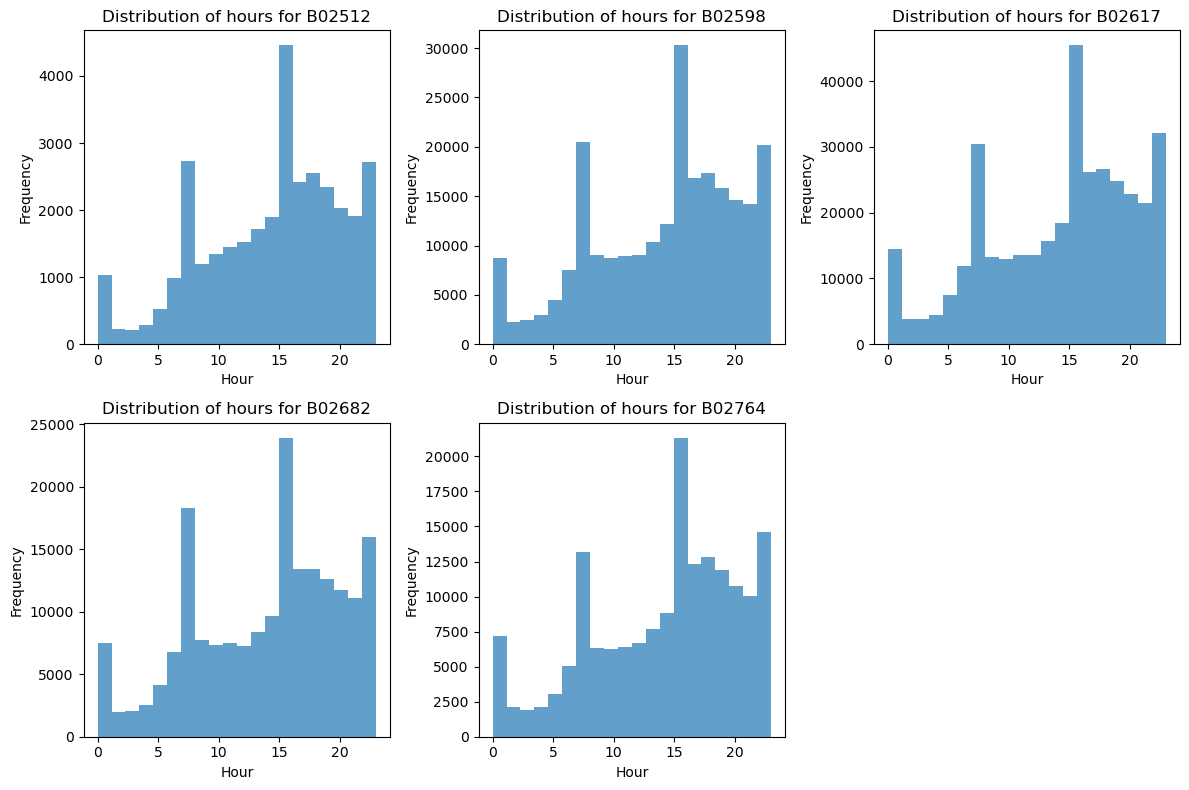

In [64]:
import matplotlib.pyplot as plt

unique_bases = ['B02512', 'B02598', 'B02617', 'B02682', 'B02764']

plt.figure(figsize=(12, 8))

for base in unique_bases:
    plt.subplot(2, 3, unique_bases.index(base) + 1)
    plt.hist(data[data['Base'] == base]['hour'], bins=20, alpha=0.7)
    plt.title(f'Distribution of hours for {base}')
    plt.xlabel('Hour')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


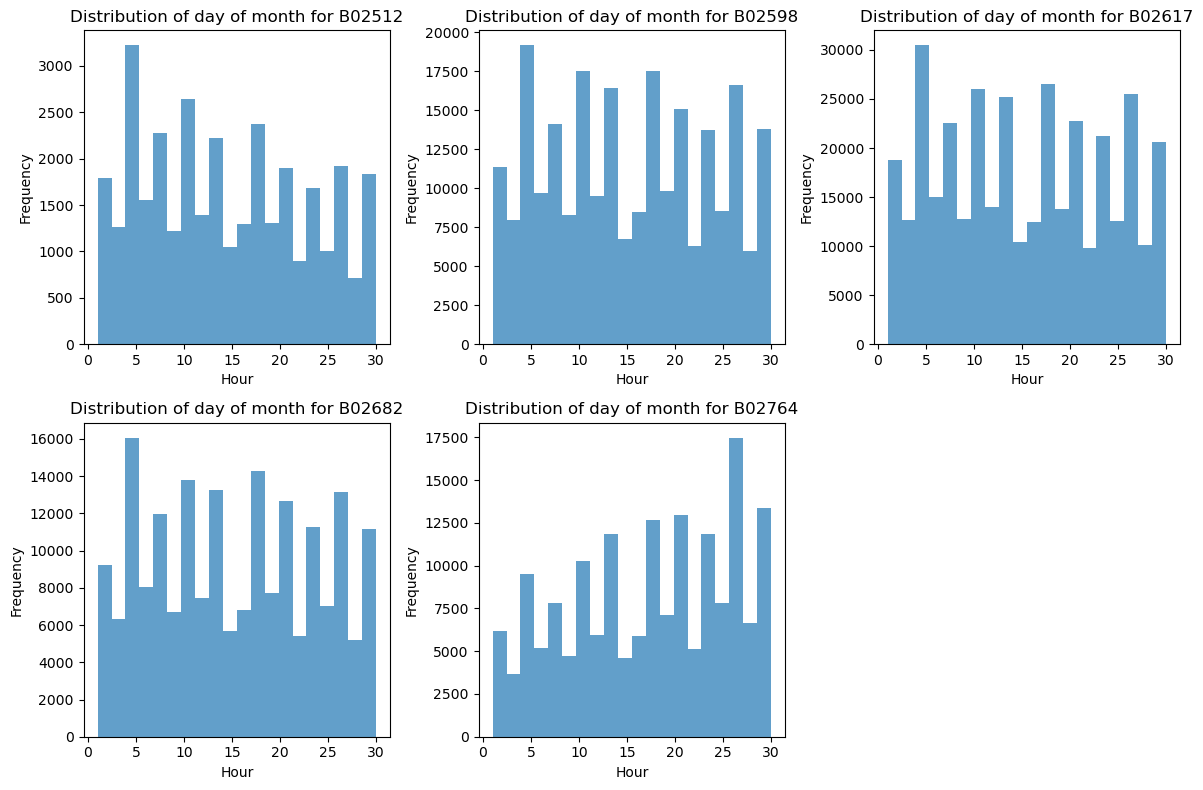

In [65]:
import matplotlib.pyplot as plt

unique_bases = ['B02512', 'B02598', 'B02617', 'B02682', 'B02764']

plt.figure(figsize=(12, 8))

for base in unique_bases:
    plt.subplot(2, 3, unique_bases.index(base) + 1)
    plt.hist(data[data['Base'] == base]['day_of_month'], bins=20, alpha=0.7)
    plt.title(f'Distribution of day of month for {base}')
    plt.xlabel('Hour')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


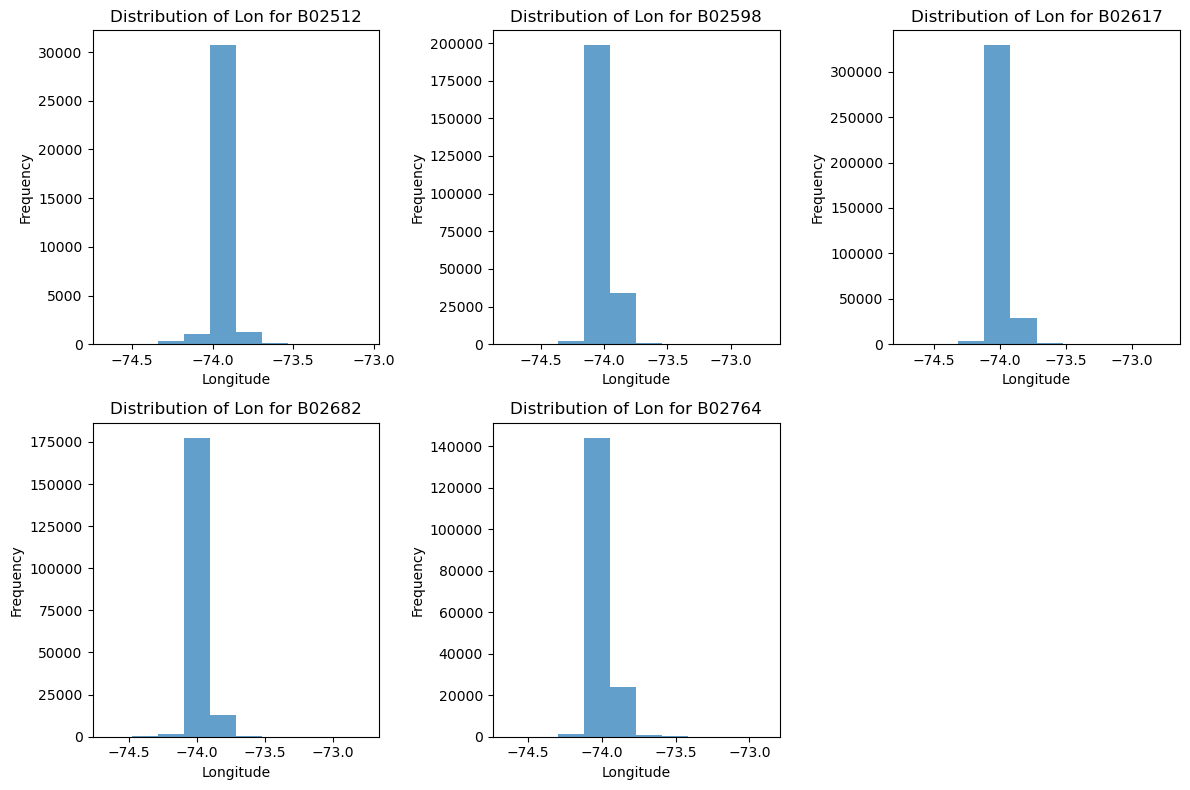

In [66]:
import matplotlib.pyplot as plt

unique_bases = ['B02512', 'B02598', 'B02617', 'B02682', 'B02764']

plt.figure(figsize=(12, 8))

for base in unique_bases:
    plt.subplot(2, 3, unique_bases.index(base) + 1)
    plt.hist(data[data['Base'] == base]['Lon'], bins=10, alpha=0.7)
    plt.title(f'Distribution of Lon for {base}')
    plt.xlabel('Longitude')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


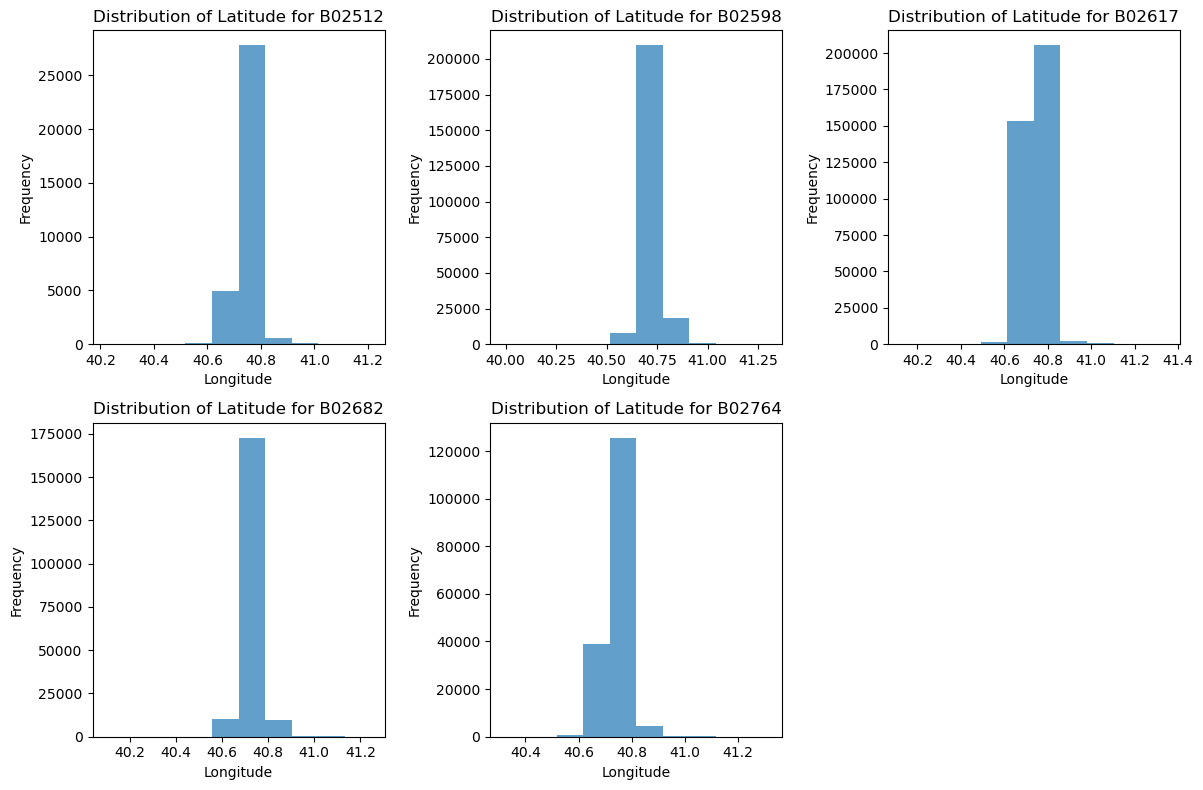

In [67]:
import matplotlib.pyplot as plt

unique_bases = ['B02512', 'B02598', 'B02617', 'B02682', 'B02764']

plt.figure(figsize=(12, 8))

for base in unique_bases:
    plt.subplot(2, 3, unique_bases.index(base) + 1)
    plt.hist(data[data['Base'] == base]['Lat'], bins=10, alpha=0.7)
    plt.title(f'Distribution of Latitude for {base}')
    plt.xlabel('Longitude')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [68]:
datafinal = pd.get_dummies(data, columns=['Base'], prefix=['Base'], drop_first=True)
datafinal.head()

,Lat,Lon,day_of_month,hour,Base_B02598,Base_B02617,Base_B02682,Base_B02764
0,40.22,-74.00,1,0,0,0,0,0
1,40.75,-74.00,1,0,0,0,0,0
2,40.76,-73.99,1,0,0,0,0,0
3,40.74,-73.99,1,0,0,0,0,0
4,40.81,-73.94,1,0,0,0,0,0


In [69]:
mean = data['Lat'].mean()
std = data["Lat"].std()
print("Mean:", mean)
print("Standard Deviation:", std)


Mean: 40.73928479697119
Standard Deviation: 0.040625198136956066


In [70]:
mean = data['Lon'].mean()
std = data["Lon"].std()
print("Mean:", mean)
print("Standard Deviation:", std)

Mean: -73.97215549695261
Standard Deviation: 0.057840180695987474


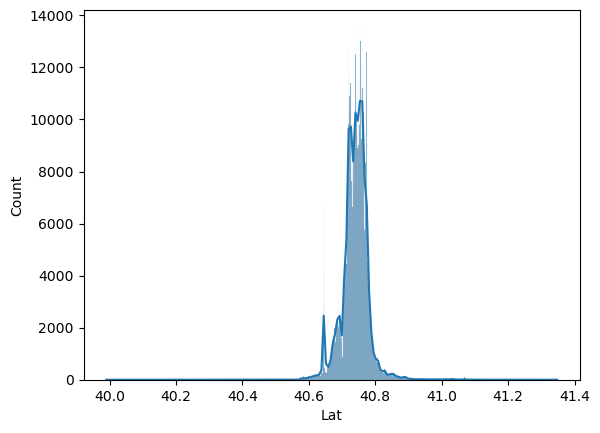

In [71]:
sns.histplot(data['Lat'], kde=True)
plt.show()

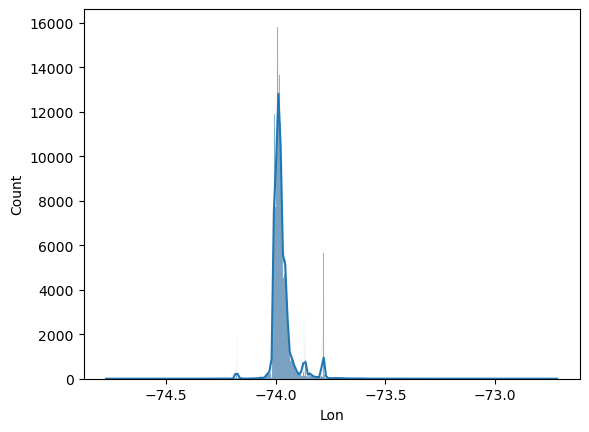

In [72]:
sns.histplot(data['Lon'], kde=True)
plt.show()

In [73]:
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_filtered

datafinal = remove_outliers_iqr(datafinal, 'Lat')
datafinal = remove_outliers_iqr(datafinal, 'Lon')

datafinal.shape

(869843, 8)

In [74]:
datafinal.head()

,Lat,Lon,day_of_month,hour,Base_B02598,Base_B02617,Base_B02682,Base_B02764
1,40.75,-74.00,1,0,0,0,0,0
2,40.76,-73.99,1,0,0,0,0,0
3,40.74,-73.99,1,0,0,0,0,0
4,40.81,-73.94,1,0,0,0,0,0
5,40.67,-73.99,1,0,0,0,0,0


In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
datafinal2 = scaler.fit_transform(datafinal)
datafinal2.shape

(869843, 8)

In [77]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0).fit(datafinal2)
clusters=kmeans.labels_

In [78]:
clusters.size

869843

In [79]:
clusters

array([8, 8, 8, ..., 1, 1, 1])

In [80]:
cluster_counts = {}

for label in clusters:
    if label in cluster_counts:
        cluster_counts[label] += 1
    else:
        cluster_counts[label] = 1


sorted_cluster_counts = sorted(cluster_counts.items(), key=lambda x: x[0])

for label, count in sorted_cluster_counts:
    print(f"For label: {label} total count is {count}")

For label: 0 total count is 70560
For label: 1 total count is 147263
For label: 2 total count is 84169
For label: 3 total count is 90506
For label: 4 total count is 74161
For label: 5 total count is 95207
For label: 6 total count is 102482
For label: 7 total count is 72210
For label: 8 total count is 69646
For label: 9 total count is 63639


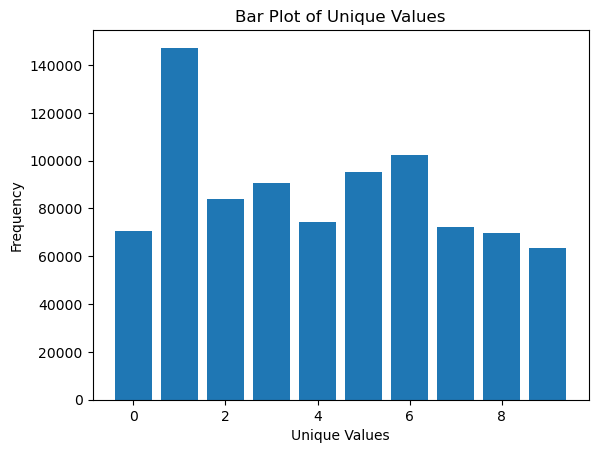

In [81]:
unique_values, counts = np.unique(clusters, return_counts=True)
plt.bar(unique_values, counts)

plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.title('Bar Plot of Unique Values')

plt.show()

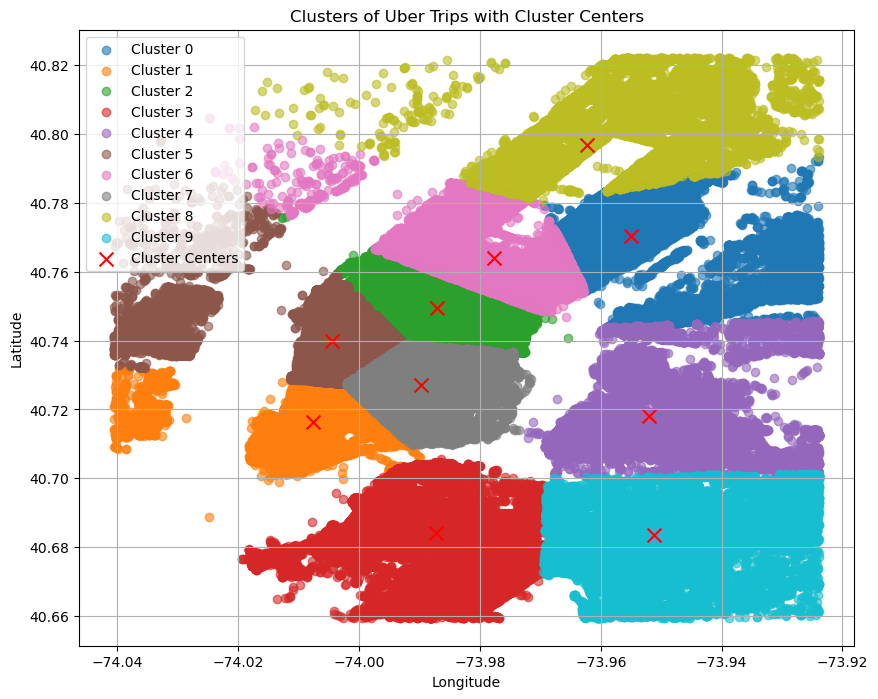

In [82]:
from sklearn.cluster import KMeans

n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
datafinal['Cluster'] = kmeans.fit_predict(datafinal[['Lat', 'Lon']])

cluster_centers = kmeans.cluster_centers_

plt.figure(figsize=(10, 8))

for cluster in range(n_clusters):
    cluster_data = datafinal[datafinal['Cluster'] == cluster]
    plt.scatter(cluster_data['Lon'], cluster_data['Lat'], label=f'Cluster {cluster}', alpha=0.6)

plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], c='red', marker='x', s=100, label='Cluster Centers')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Uber Trips with Cluster Centers')
plt.legend()
plt.grid(True)
plt.show()


In [83]:
np.random.seed(7)

datafinal3 = np.random.choice(datafinal2.shape[0], size=10000, replace=False)
sampled_data = datafinal2[datafinal3, :]
sampled_data.shape

(10000, 8)

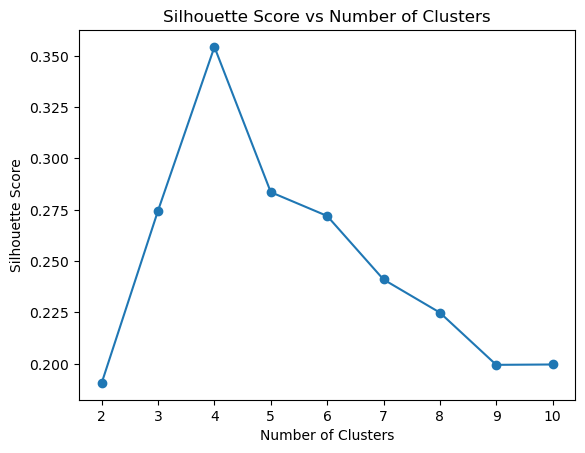

Best number of clusters (max silhouette score): 4


In [93]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters_range = range(2, 11)

best_n = None
max_silhouette = -1
silhouette_scores = []

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(sampled_data)
    clusters = kmeans.labels_

    silhouette_avg = silhouette_score(sampled_data, clusters)
    silhouette_scores.append(silhouette_avg)

    if silhouette_avg > max_silhouette:
        max_silhouette = silhouette_avg
        best_n = n_clusters

plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

print(f"Best number of clusters (max silhouette score): {best_n}")

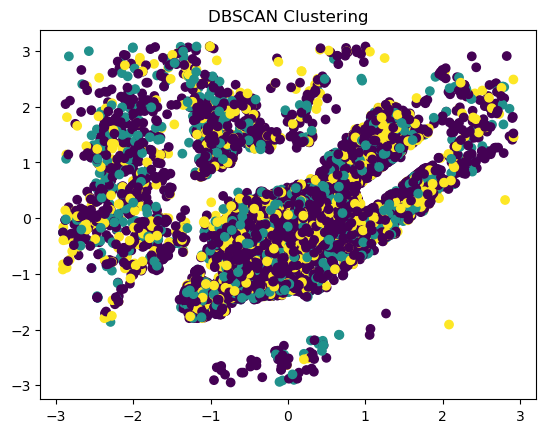

Silhouette Score: 0.32122419936873486


In [119]:
from sklearn.cluster import DBSCAN

features = sampled_data[:, 1:] 

dbscan = DBSCAN(eps=2.5, min_samples=6)  
cluster_labels = dbscan.fit_predict(features)

sampled_data_with_labels = np.column_stack((sampled_data, cluster_labels))

plt.scatter(sampled_data[:, 0], sampled_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

silhouette_avg = silhouette_score(features, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

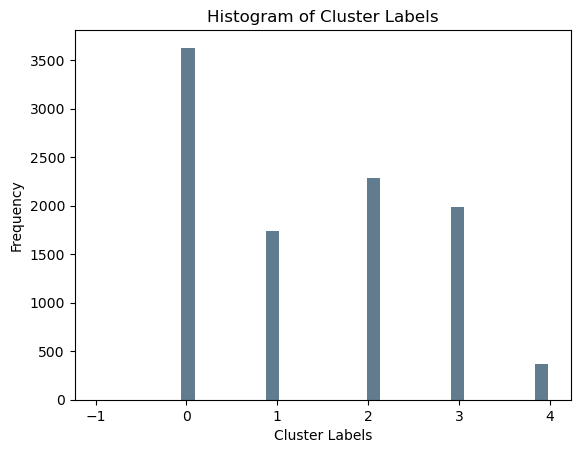

In [97]:
plt.hist(cluster_labels, bins='auto', rwidth=0.8, color='#607c8e')
plt.title('Histogram of Cluster Labels')
plt.xlabel('Cluster Labels')
plt.ylabel('Frequency')
plt.show()

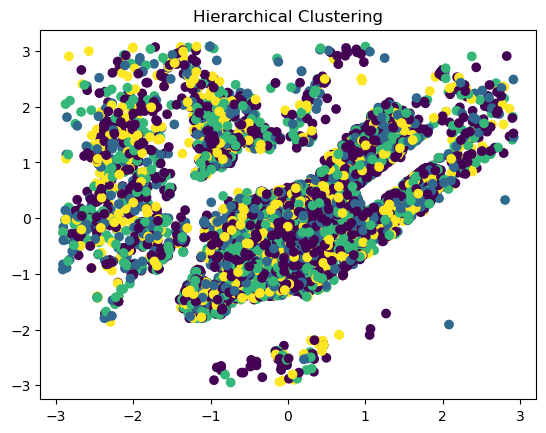

Silhouette Score (Hierarchical): 0.41078051658888043


In [98]:
from sklearn.cluster import AgglomerativeClustering

features = sampled_data[:, 1:] 

agg_clustering = AgglomerativeClustering(n_clusters=4)  
cluster_labels_agg = agg_clustering.fit_predict(features)

sampled_data_with_labels_agg = np.column_stack((sampled_data, cluster_labels_agg))

plt.scatter(sampled_data[:, 0], sampled_data[:, 1], c=cluster_labels_agg, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.show()

silhouette_avg_agg = silhouette_score(features, cluster_labels_agg)
print(f"Silhouette Score (Hierarchical): {silhouette_avg_agg}")

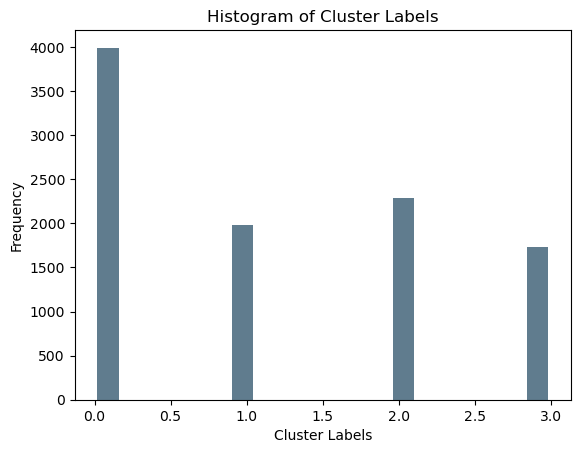

In [99]:
plt.hist(cluster_labels_agg, bins='auto', rwidth=0.8, color='#607c8e')
plt.title('Histogram of Cluster Labels')
plt.xlabel('Cluster Labels')
plt.ylabel('Frequency')
plt.show()

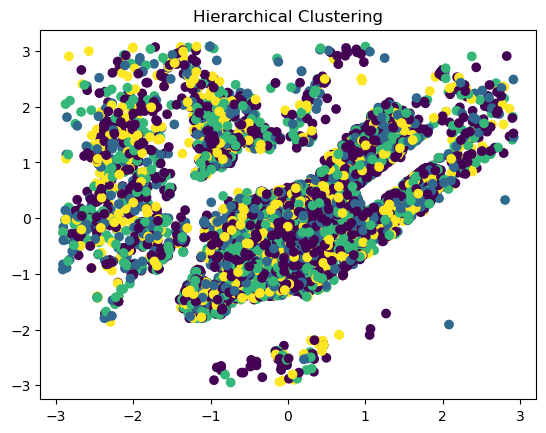

Silhouette Score (Hierarchical): 0.41078051658888043


In [105]:
from sklearn.cluster import AgglomerativeClustering

features = sampled_data[:, 1:] 

agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')  
cluster_labels_agg = agg_clustering.fit_predict(features)

sampled_data_with_labels_agg = np.column_stack((sampled_data, cluster_labels_agg))

plt.scatter(sampled_data[:, 0], sampled_data[:, 1], c=cluster_labels_agg, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.show()

silhouette_avg_agg = silhouette_score(features, cluster_labels_agg)
print(f"Silhouette Score (Hierarchical): {silhouette_avg_agg}")

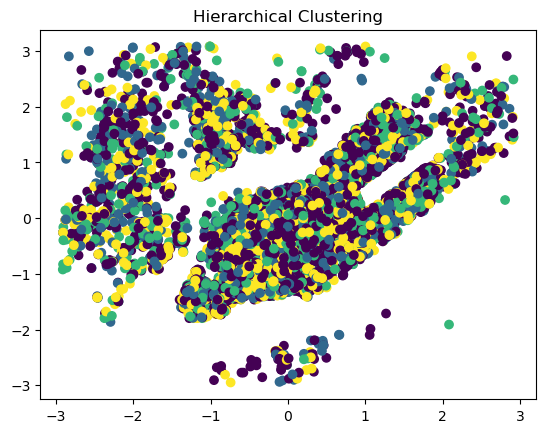

Silhouette Score (Hierarchical): 0.41078051658888043


In [108]:
from sklearn.cluster import AgglomerativeClustering

features = sampled_data[:, 1:] 

agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='average')  
cluster_labels_agg = agg_clustering.fit_predict(features)

sampled_data_with_labels_agg = np.column_stack((sampled_data, cluster_labels_agg))

plt.scatter(sampled_data[:, 0], sampled_data[:, 1], c=cluster_labels_agg, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.show()

silhouette_avg_agg = silhouette_score(features, cluster_labels_agg)
print(f"Silhouette Score (Hierarchical): {silhouette_avg_agg}")

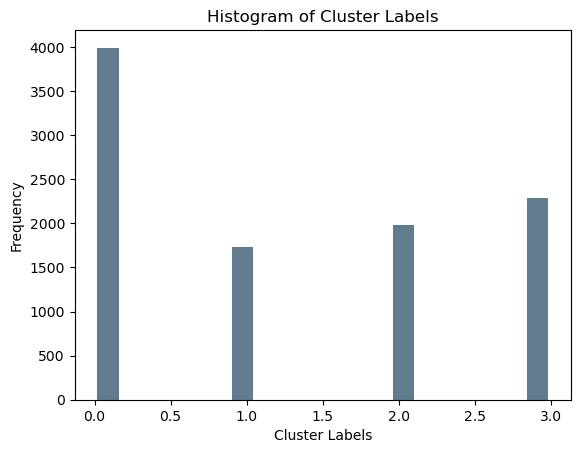

In [109]:
plt.hist(cluster_labels_agg, bins='auto', rwidth=0.8, color='#607c8e')
plt.title('Histogram of Cluster Labels')
plt.xlabel('Cluster Labels')
plt.ylabel('Frequency')
plt.show()

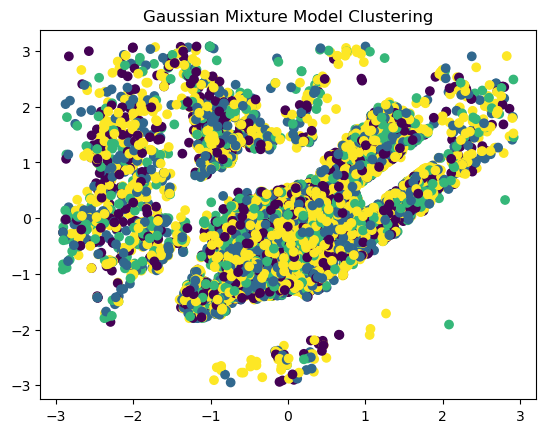

Silhouette Score (GMM): 0.41078051658888043


In [110]:
from sklearn.mixture import GaussianMixture

features = sampled_data[:, 1:] 

gmm = GaussianMixture(n_components=4)  
cluster_labels_gmm = gmm.fit_predict(features)

sampled_data_with_labels_gmm = np.column_stack((sampled_data, cluster_labels_gmm))

plt.scatter(sampled_data[:, 0], sampled_data[:, 1], c=cluster_labels_gmm, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.show()

silhouette_avg_gmm = silhouette_score(features, cluster_labels_gmm)
print(f"Silhouette Score (GMM): {silhouette_avg_gmm}")


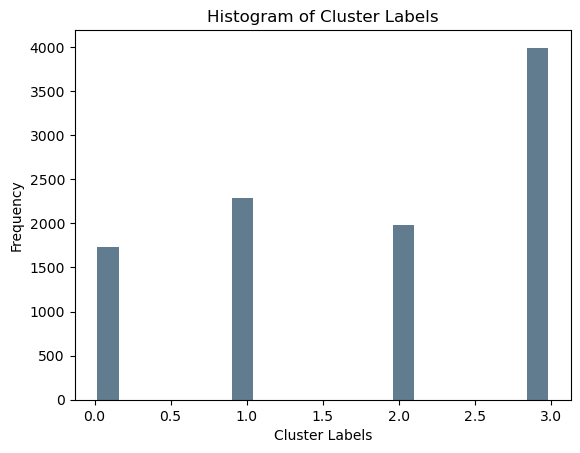

In [111]:
plt.hist(cluster_labels_gmm, bins='auto', rwidth=0.8, color='#607c8e')
plt.title('Histogram of Cluster Labels')
plt.xlabel('Cluster Labels')
plt.ylabel('Frequency')
plt.show()

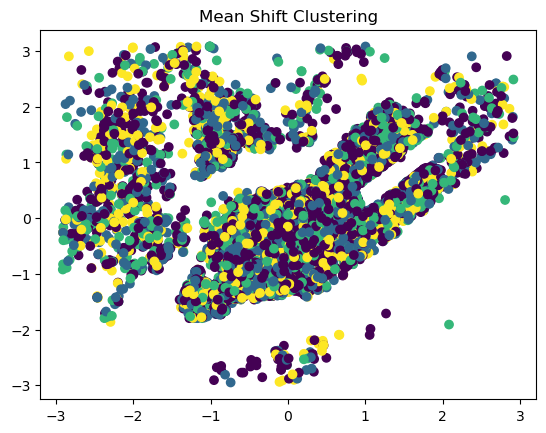

Silhouette Score (Mean Shift): 0.41078051658888043


In [112]:
from sklearn.cluster import MeanShift

features = sampled_data[:, 1:] 

mean_shift = MeanShift(bandwidth=2.5) 
cluster_labels_mean_shift = mean_shift.fit_predict(features)

sampled_data_with_labels_mean_shift = np.column_stack((sampled_data, cluster_labels_mean_shift))

plt.scatter(sampled_data[:, 0], sampled_data[:, 1], c=cluster_labels_mean_shift, cmap='viridis')
plt.title('Mean Shift Clustering')
plt.show()

silhouette_avg_mean_shift = silhouette_score(features, cluster_labels_mean_shift)
print(f"Silhouette Score (Mean Shift): {silhouette_avg_mean_shift}")


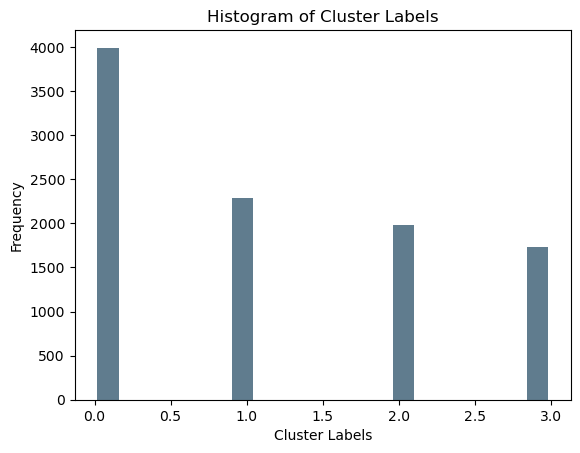

In [113]:
plt.hist(cluster_labels_mean_shift, bins='auto', rwidth=0.8, color='#607c8e')
plt.title('Histogram of Cluster Labels')
plt.xlabel('Cluster Labels')
plt.ylabel('Frequency')
plt.show()

In [122]:
for bandwidth in [0.5, 1, 1.5, 2, 2.5]:
    mean_shift = MeanShift(bandwidth=bandwidth)
    cluster_labels_mean_shift = mean_shift.fit_predict(features)
    silhouette_avg_mean_shift = silhouette_score(features, cluster_labels_mean_shift)
    print(f"Bandwidth: {bandwidth}, Silhouette Score: {silhouette_avg_mean_shift}")

Bandwidth: 0.5, Silhouette Score: 0.22178269006023216
Bandwidth: 1, Silhouette Score: 0.1495976317178744
Bandwidth: 1.5, Silhouette Score: 0.31510164368588645
Bandwidth: 2, Silhouette Score: 0.31510164368588645
Bandwidth: 2.5, Silhouette Score: 0.41078051658888043


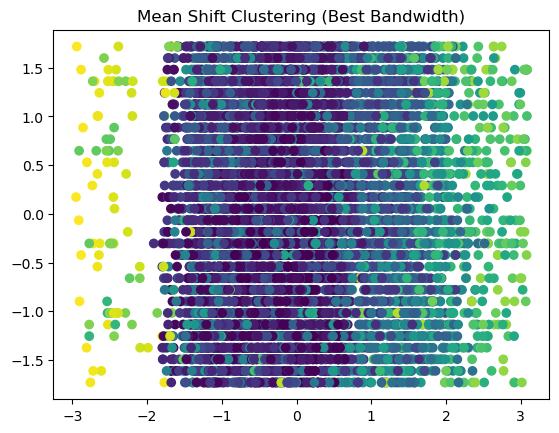

Best Bandwidth: 0.5
Silhouette Score (Best Bandwidth): 0.22178269006023216


In [124]:
from sklearn.cluster import MeanShift
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, make_scorer

features = sampled_data[:, 1:]

param_grid = {'bandwidth': np.arange(0.5, 5.0, 0.5)}

mean_shift = MeanShift()

silhouette_scorer = make_scorer(silhouette_score)

grid_search = GridSearchCV(mean_shift, param_grid, scoring=silhouette_scorer, cv=5)

grid_search.fit(features)

best_bandwidth = grid_search.best_params_['bandwidth']
best_mean_shift_model = grid_search.best_estimator_

cluster_labels_best = best_mean_shift_model.fit_predict(features)

plt.scatter(features[:, 0], features[:, 1], c=cluster_labels_best, cmap='viridis')
plt.title('Mean Shift Clustering (Best Bandwidth)')
plt.show()

silhouette_avg_best = silhouette_score(features, cluster_labels_best)
print(f"Best Bandwidth: {best_bandwidth}")
print(f"Silhouette Score (Best Bandwidth): {silhouette_avg_best}")